In [1]:
# -*- coding: utf-8 -*- #

# Write libraries here #########################################
import matplotlib.patches as pat
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
# from astroquery.gama import GAMA
from jupyterthemes import jtplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, cluster, preprocessing, mixture
from time import time
from tqdm import tnrange, tqdm_notebook
%matplotlib inline

import seaborn as sns; sns.set(style="ticks", color_codes=True)
# %matplotlib notebook
################################################################

# Showing 500 columns and rows #################################
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
################################################################

# NOT CHANGE (The PATH for directory) ##########################
CURRENT_DIR_NAME = os.path.dirname(os.path.abspath(__name__))
PATH_DATA = os.path.join(CURRENT_DIR_NAME, '../data/')
PATH_HIST = os.path.join(CURRENT_DIR_NAME, '../histogram/')
PATH_PLOT = os.path.join(CURRENT_DIR_NAME, '../plots/')
PATH_IMG = os.path.join(CURRENT_DIR_NAME, '../images/')
PATH_HTML = os.path.join(CURRENT_DIR_NAME, '../html/')
PATH_TEX = os.path.join(CURRENT_DIR_NAME, '../for_tex/')
################################################################

#When you make plots, jtplot is better.
jtplot.style(theme='grade3', context='notebook', fscale=3, spines=True, gridlines='--', ticks=False, grid=False)

In [2]:
completed_data = pd.read_pickle(PATH_DATA + 'GAMADataForManifold.pickle')
completed_data = completed_data.sample(frac=0.1).reset_index(drop=True)

DATA_GAMA_FLUX = completed_data.copy()

N_COMP = 8

In [3]:
display(completed_data.describe())

,RA,DEC,FUV_flux,FUV_fluxerr,NUV_flux,NUV_fluxerr,u_flux,u_fluxerr,g_flux,g_fluxerr,r_flux,r_fluxerr,i_flux,i_fluxerr,z_flux,z_fluxerr,X_flux,X_fluxerr,Y_flux,Y_fluxerr,J_flux,J_fluxerr,H_flux,H_fluxerr,K_flux,K_fluxerr,W1_flux,W1_fluxerr,W2_flux,W2_fluxerr,W3_flux,W3_fluxerr,W4_flux,W4_fluxerr,P100_flux,P100_fluxerr,P160_flux,P160_fluxerr,S250_flux,S250_fluxerr,S350_flux,S350_fluxerr,S500_flux,S500_fluxerr,Z_TONRY,NQ,KCORR_FUV,KCORR_NUV,KCORR_U,KCORR_G,KCORR_R,KCORR_I,KCORR_Z,KCORR_Y,KCORR_J,KCORR_H,KCORR_K,PCOEFF_R_1,PCOEFF_R_2,PCOEFF_R_3,PCOEFF_R_4,PCOEFF_R_5,COEFFS_1,COEFFS_2,COEFFS_3,COEFFS_4,COEFFS_5,CHI2,MASS,INTSFH,METS,B300,B1000,FUV_flux_kcorrected,NUV_flux_kcorrected,H_flux_kcorrected,I_flux_kcorrected,K_flux_kcorrected,G_flux_kcorrected,Z_flux_kcorrected,Y_flux_kcorrected,J_flux_kcorrected,R_flux_kcorrected,U_flux_kcorrected,R-K,NUV-R
count,7377.000000,7377.000000,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7377.000000,7.377000e+03,7377.000000,7.377000e+03,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7.377000e+03,7377.000000,7.377000e+03,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7.377000e+03,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7377.000000,7.377000e+03,7.377000e+03,7377.000000,7.377000e+03,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000
mean,189.652808,0.370862,1.115620e-05,1.395397e-06,2.100103e-05,7.132604e-06,5.061631e-05,6.170083e-06,1.597128e-04,6.603760e-06,0.000308,9.346535e-06,0.000436,1.247928e-05,0.000536,0.000026,-6.093421,-6.093921,0.000636,0.000036,0.000751,0.000032,0.000912,0.000038,0.000904,0.000039,0.000493,0.000068,0.000328,0.000067,9.654784e-04,0.000140,1.817200e-03,0.000920,-132.268050,-132.288373,-132.396386,-132.421389,-1.444684e+02,-144.487365,-144.209802,-144.216436,-144.081093,-144.079829,0.200152,4.121052,0.246357,0.118635,0.425410,0.455947,0.201540,0.060940,0.069455,0.097985,-0.020099,0.003489,-0.331010,-0.000966,1.723767,-6.345420,12.735482,-4.863630,4.109538e-06,1.083920e-09,7.737211e-07,9.752489e-06,1.770216e-07,1.894836,2.644224e+10,4.771701e+10,0.029592,2.055356e-02,0.267713,-17.268698,-18.152785,-22.198730,-21.454792,-21.967359,-20.623560,-21.675631,-21.905334,-21.957870,-21.208810,-19.321332,0.758549,3.056025
std,33.807677,1.351863,1.425969e-04,6.784578e-06,2.758479e-04,6.068013e-05,8.065691e-04,3.437661e-05,2.495192e-03,2.882830e-05,0.004430,3.323811e-05,0.006061,4.489431e-05,0.007360,0.000092,77.791627,77.791588,0.007886,0.000198,0.009348,0.000141,0.011226,0.000133,0.009660,0.000141,0.006030,0.000191,0.003690,0.000315,1.794960e-02,0.000284,3.414477e-02,0.001108,338.666803,338.658013,338.816414,338.805753,3.514191e+02,351.411085,351.140004,351.137255,351.000134,351.000650,0.101524,0.375298,0.516403,0.244810,0.354594,0.332351,0.142164,0.141102,0.106002,0.122219,0.090098,0.068369,0.124962,0.003230,0.687948,6.610303,18.241300,17.376476,3.728725e-05,7.718370e-09,5.293884e-06,7.590417e-05,7.879486e-07,13.926672,3.351715e+10,6.048198e+10,0.007705,4.540225e-02,0.186724,1.574143,1.430889,1.439844,1.309077,1.455509,1.183014,1.346747,1.384856,1.403808,1.244353,1.182315,0.359731,1.278512
min,129.000109,-2.951733,2.516440e-09,1.256840e-08,5.118880e-09,2.704690e-07,4.778040e-08,3.043780e-07,2.479180e-07,1.565750e-07,0.000010,2.260510e-07,0.000009,2.658190e-07,0.000010,0.000001,-999.000000,-999.000000,0.000018,0.000002,0.000001,0.000002,0.000007,0.000003,0.00

In [4]:
# Select columns for classification and manifold learning
X = completed_data[['Z_TONRY', 'FUV_flux_kcorrected', 'NUV_flux_kcorrected',
                    'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
                    'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

# Select columns for classification and manifold learning
X = completed_data[['FUV_flux_kcorrected', 'NUV_flux_kcorrected',
                    'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
                    'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

X.describe()

,FUV_flux_kcorrected,NUV_flux_kcorrected,U_flux_kcorrected,G_flux_kcorrected,R_flux_kcorrected,I_flux_kcorrected,Z_flux_kcorrected,Y_flux_kcorrected,J_flux_kcorrected,H_flux_kcorrected,K_flux_kcorrected
count,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000
mean,-17.268698,-18.152785,-19.321332,-20.623560,-21.208810,-21.454792,-21.675631,-21.905334,-21.957870,-22.198730,-21.967359
std,1.574143,1.430889,1.182315,1.183014,1.244353,1.309077,1.346747,1.384856,1.403808,1.439844,1.455509
min,-23.071381,-22.907440,-22.905093,-23.499008,-24.235477,-24.656181,-24.990637,-25.252588,-25.336418,-25.638654,-25.765690
25%,-18.337897,-19.158694,-20.142298,-21.456639,-22.093654,-22.390765,-22.631947,-22.899479,-22.960984,-23.237712,-23.017663
50%,-17.428053,-18.290897,-19.445183,-20.799173,-21.399716,-21.660314,-21.902832,-22.155273,-22.215568,-22.473365,-22.253742
75%,-16.363652,-17.307203,-18.617168,-19.944675,-20.498404,-20.712949,-20.930331,-21.129272,-21.179391,-21.410215,-21.168827
max,-10.024130,-11.740873,-15.005659,-15.068499,-16.027491,-16.123981,-16.074939,-16.162030,-16.098098,-16.122134,-15.933561


In [5]:
# X['FUV_flux_kcorrected'] = 10**(-0.4*completed_data['FUV_flux_kcorrected']) 
# X['NUV_flux_kcorrected'] = 10**(-0.4*completed_data['NUV_flux_kcorrected'])
# X['U_flux_kcorrected'] = 10**(-0.4*completed_data['U_flux_kcorrected'])
# X['G_flux_kcorrected'] = 10**(-0.4*completed_data['G_flux_kcorrected'])
# X['R_flux_kcorrected'] = 10**(-0.4*completed_data['R_flux_kcorrected'])
# X['I_flux_kcorrected'] = 10**(-0.4*completed_data['I_flux_kcorrected'])
# X['Z_flux_kcorrected'] = 10**(-0.4*completed_data['Z_flux_kcorrected'])
# X['Y_flux_kcorrected'] = 10**(-0.4*completed_data['Y_flux_kcorrected'])
# X['J_flux_kcorrected'] = 10**(-0.4*completed_data['J_flux_kcorrected'])
# X['H_flux_kcorrected'] = 10**(-0.4*completed_data['H_flux_kcorrected'])
# X['K_flux_kcorrected'] = 10**(-0.4*completed_data['K_flux_kcorrected'])

# # X['FUV_flux_kcorrected'] = 10**(-0.4*completed_data['FUV_flux_kcorrected'] - 8) 
# # X['NUV_flux_kcorrected'] = 10**(-0.4*completed_data['NUV_flux_kcorrected'] - 8)
# # X['U_flux_kcorrected'] = 10**(-0.4*completed_data['U_flux_kcorrected'] - 8)
# # X['G_flux_kcorrected'] = 10**(-0.4*completed_data['G_flux_kcorrected'] - 8)
# # X['R_flux_kcorrected'] = 10**(-0.4*completed_data['R_flux_kcorrected'] - 8)
# # X['I_flux_kcorrected'] = 10**(-0.4*completed_data['I_flux_kcorrected'] - 8)
# # X['Z_flux_kcorrected'] = 10**(-0.4*completed_data['Z_flux_kcorrected'] - 8)
# # X['Y_flux_kcorrected'] = 10**(-0.4*completed_data['Y_flux_kcorrected'] - 8)
# # X['J_flux_kcorrected'] = 10**(-0.4*completed_data['J_flux_kcorrected'] - 8)
# # X['H_flux_kcorrected'] = 10**(-0.4*completed_data['H_flux_kcorrected'] - 8)
# # X['K_flux_kcorrected'] = 10**(-0.4*completed_data['K_flux_kcorrected'] - 8)

# X.describe()

# # X = X.sample(frac=0.).reset_index(drop=True)

In [6]:
x_diff = []

orig_data = np.array(X)#[:100,:]
i=0
j=1

p = 0
while i<11:
    while j <11:
        diff = orig_data[:,i] - orig_data[:,j]
        x_diff.append(diff)
#         print(i,j)
        p += 1
        
        j+=1
    i += 1
    j = i+1
    
x_diff.append(completed_data['Z_TONRY'])

# x_diff.append(completed_data['FUV_flux_kcorrected'])
# x_diff.append(completed_data['NUV_flux_kcorrected'])
# x_diff.append(completed_data['U_flux_kcorrected'])
# x_diff.append(completed_data['G_flux_kcorrected'])
# x_diff.append(completed_data['R_flux_kcorrected'])
# x_diff.append(completed_data['I_flux_kcorrected'])
# x_diff.append(completed_data['Z_flux_kcorrected'])
# x_diff.append(completed_data['Y_flux_kcorrected'])
# x_diff.append(completed_data['J_flux_kcorrected'])
# x_diff.append(completed_data['H_flux_kcorrected'])
# x_diff.append(completed_data['K_flux_kcorrected'])
    
# print(f"p={p}")
x_diff = np.array(x_diff)
X_DIFF = pd.DataFrame(x_diff.T)
# X_DIFF = X_DIFF.sample(frac=1).reset_index(drop=True)
X_DIFF.describe()

X = X_DIFF

In [7]:
# # RobustScaler uses [0.25, 0.75] samples
# # sc=preprocessing.RobustScaler(quantile_range=(25, 75))#StandardScaler()
# # sc=preprocessing.StandardScaler(with_mean=True, with_std=True)
# sc=preprocessing.MaxAbsScaler()
# # sc=preprocessing.MinMaxScaler()
# sc.fit(X)
# X=sc.transform(X)

# # x=X[:,0]
# # y=X[:,1]

# # print(X_norm)

# X = pd.DataFrame(X)
# X.describe()

In [8]:
%load_ext rpy2.ipython

t0 = time()

In [9]:
%%R -i X -o out

# install.packages("FisherEM")
library(FisherEM)

# out = fem(X, K=2:12, model='AkBk', nstart=20, disp=TRUE, mc.cores=(detectCores()-1))
out = fem(X, K=6:12, model='AkBk', nstart=20, disp=TRUE, mc.cores=(detectCores()-1))

R[write to console]: Loading required package: MASS

R[write to console]: Loading required package: parallel

R[write to console]: Loading required package: elasticnet

R[write to console]: Loading required package: lars

R[write to console]: Loaded lars 1.2




The selected model is AkBk with K = 8 ( icl = 65092.66 )


In [10]:
print("(time %.2fs)" %(time() - t0))

labels = np.array(out[2])

labels -= 1
N_COMP = int(out[1][0])
print(out)



(time 215.34s)
* Model: The chosen model is AkBk with K = 8 (icl=65092.66)



In [11]:
# X_prep = X_tsne

# # #Execute the K-means
# # km=cluster.KMeans(n_clusters=N_COMP)
# # z_km=km.fit(X_DIFF)

# # Execute the VBGMM
# vbgm = mixture.BayesianGaussianMixture(n_components=N_COMP, covariance_type='full', max_iter=1000, verbose=1)
# vbgm=vbgm.fit(X_prep)

# labels=vbgm.predict(X_prep)

(labels)

array([6, 3, 6, ..., 5, 3, 7], dtype=int32)

In [12]:
# Add the label from KMEANS to the original pd.DataFrame
# data_for_manifoldlearning_plus_label = X.join(pd.DataFrame(labels, index=X.index, columns=['label']))
DATA_GAMA_FLUX = completed_data.join(pd.DataFrame(labels, index=X.index, columns=['label']))

label:0, center_point=(0.938201424246228, 3.256969100343291)
# of samples : 491
label:1, center_point=(0.5631972116713958, 2.2237668541524265)
# of samples : 1462
label:2, center_point=(0.999240838503627, 3.679400739732648)
# of samples : 1058
label:3, center_point=(0.8350284091438763, 2.7972610935535416)
# of samples : 1518
label:4, center_point=(0.9983595364256155, 5.156971134883826)
# of samples : 805
label:5, center_point=(0.30030166713449274, 1.640411509300736)
# of samples : 1086
label:6, center_point=(0.8666163798347201, 2.85321932498763)
# of samples : 635
label:7, center_point=(0.9530607761990496, 5.62200542248145)
# of samples : 322



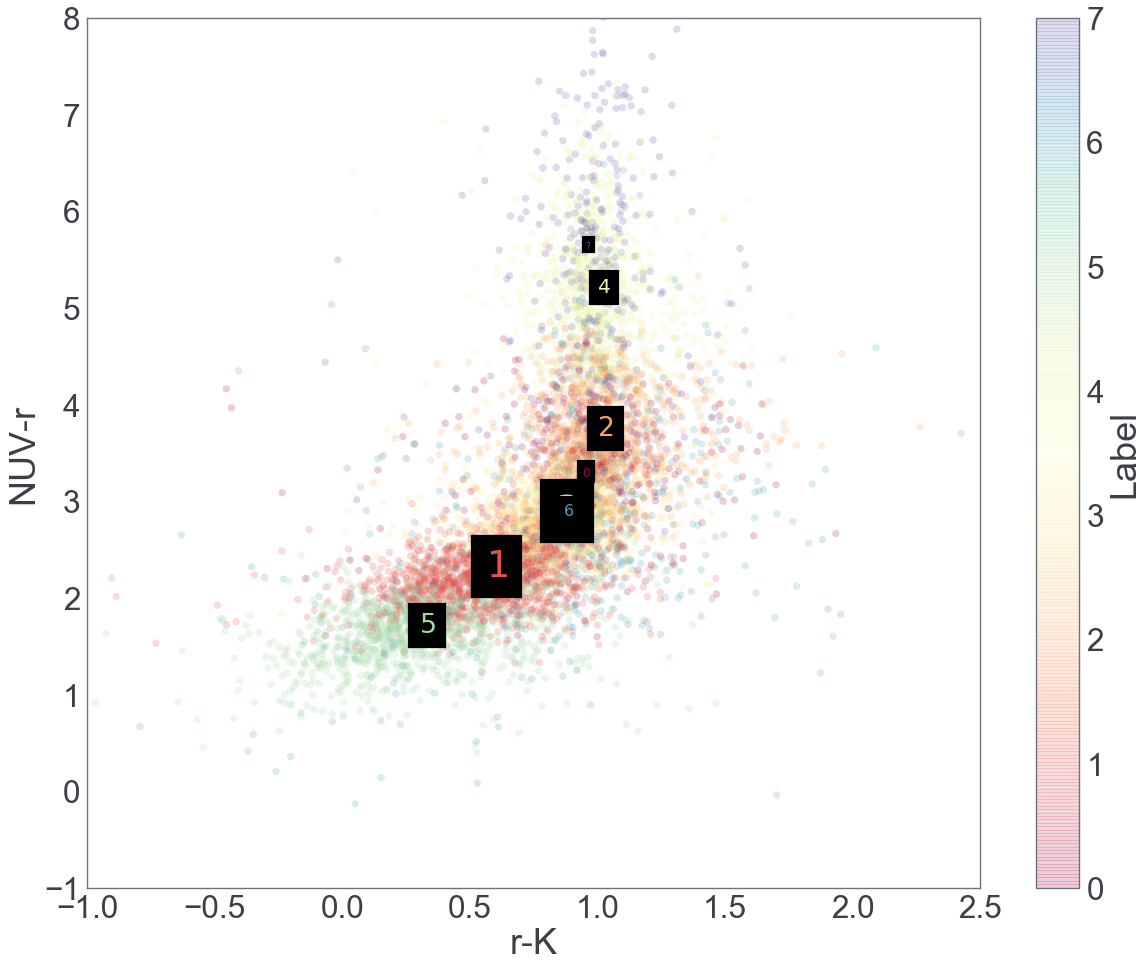

In [21]:
# Show the color-color plot with labels (each number on the plot shows the label number)

plt.figure(figsize=(20, 16))
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=(N_COMP-1))
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])

for i in tnrange(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'NUV-R'])
    print('label:%s, center_point=(%s, %s)'%(i, x_mean, y_mean))
    print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])))
    plt.text(x_mean, y_mean, '$%s$'%(i), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])/40, color=plt.cm.Spectral(i/(N_COMP-1)))
    

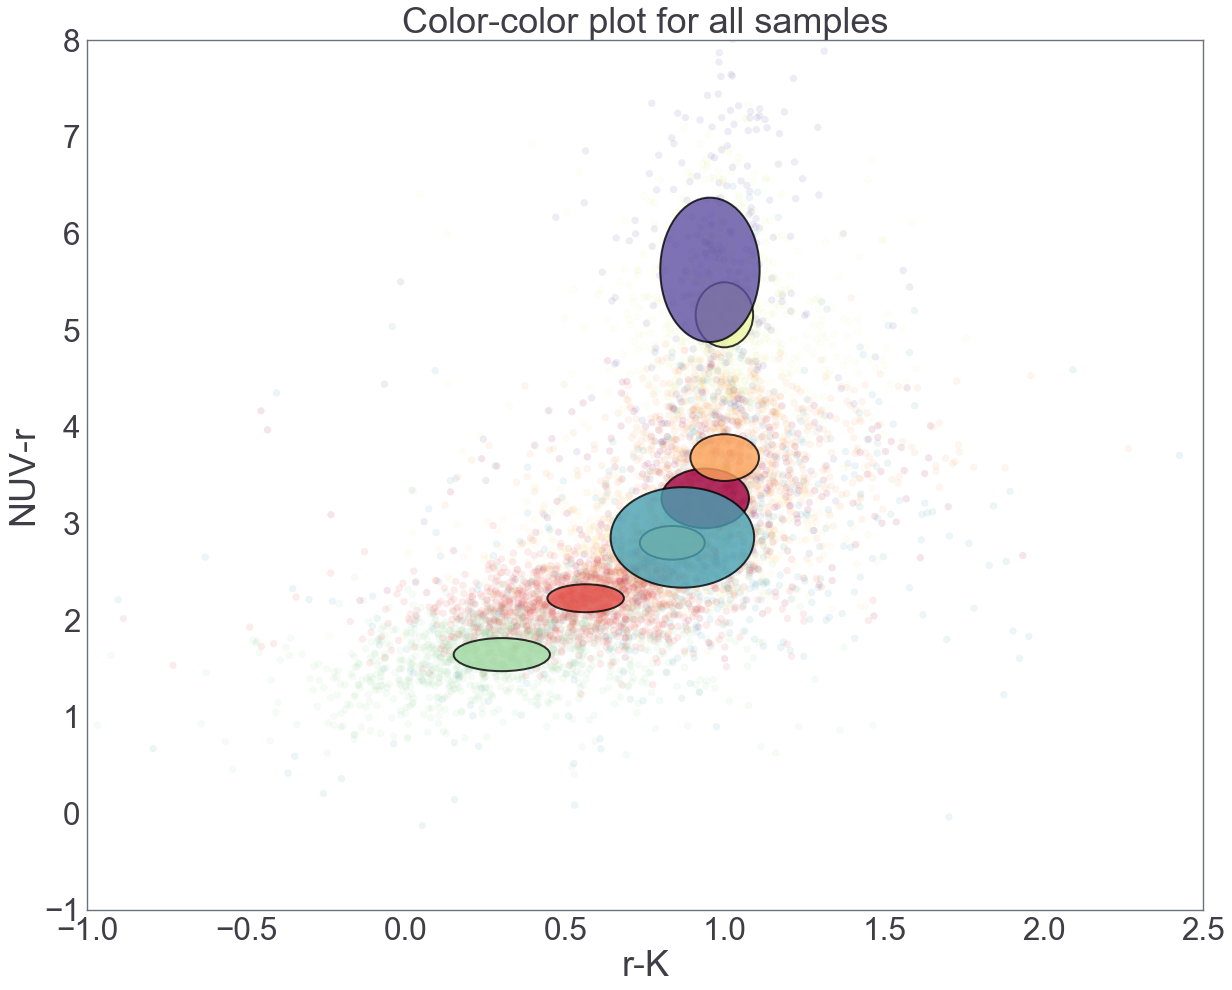

In [14]:
# Show the color-color plot with labels (each number on the plot shows the label number)

f = plt.figure(figsize=(20, 16))
ax = f.add_subplot(111)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.8, angle = 0, 
                        facecolor =plt.cm.Spectral(j/(N_COMP-1)), edgecolor='black', lw = 2)
        ax.add_patch(e1)


label:0, center_point=(0.938201424246228, 3.256969100343291)
# of samples : 7
label:1, center_point=(0.5631972116713958, 2.2237668541524265)
# of samples : 8
label:2, center_point=(0.999240838503627, 3.679400739732648)
# of samples : 5
label:3, center_point=(0.8350284091438763, 2.7972610935535416)
# of samples : 12
label:4, center_point=(0.9983595364256155, 5.156971134883826)
# of samples : 3
label:5, center_point=(0.30030166713449274, 1.640411509300736)
# of samples : 11
label:6, center_point=(0.8666163798347201, 2.85321932498763)
# of samples : 17
label:7, center_point=(0.9530607761990496, 5.62200542248145)
# of samples : 1


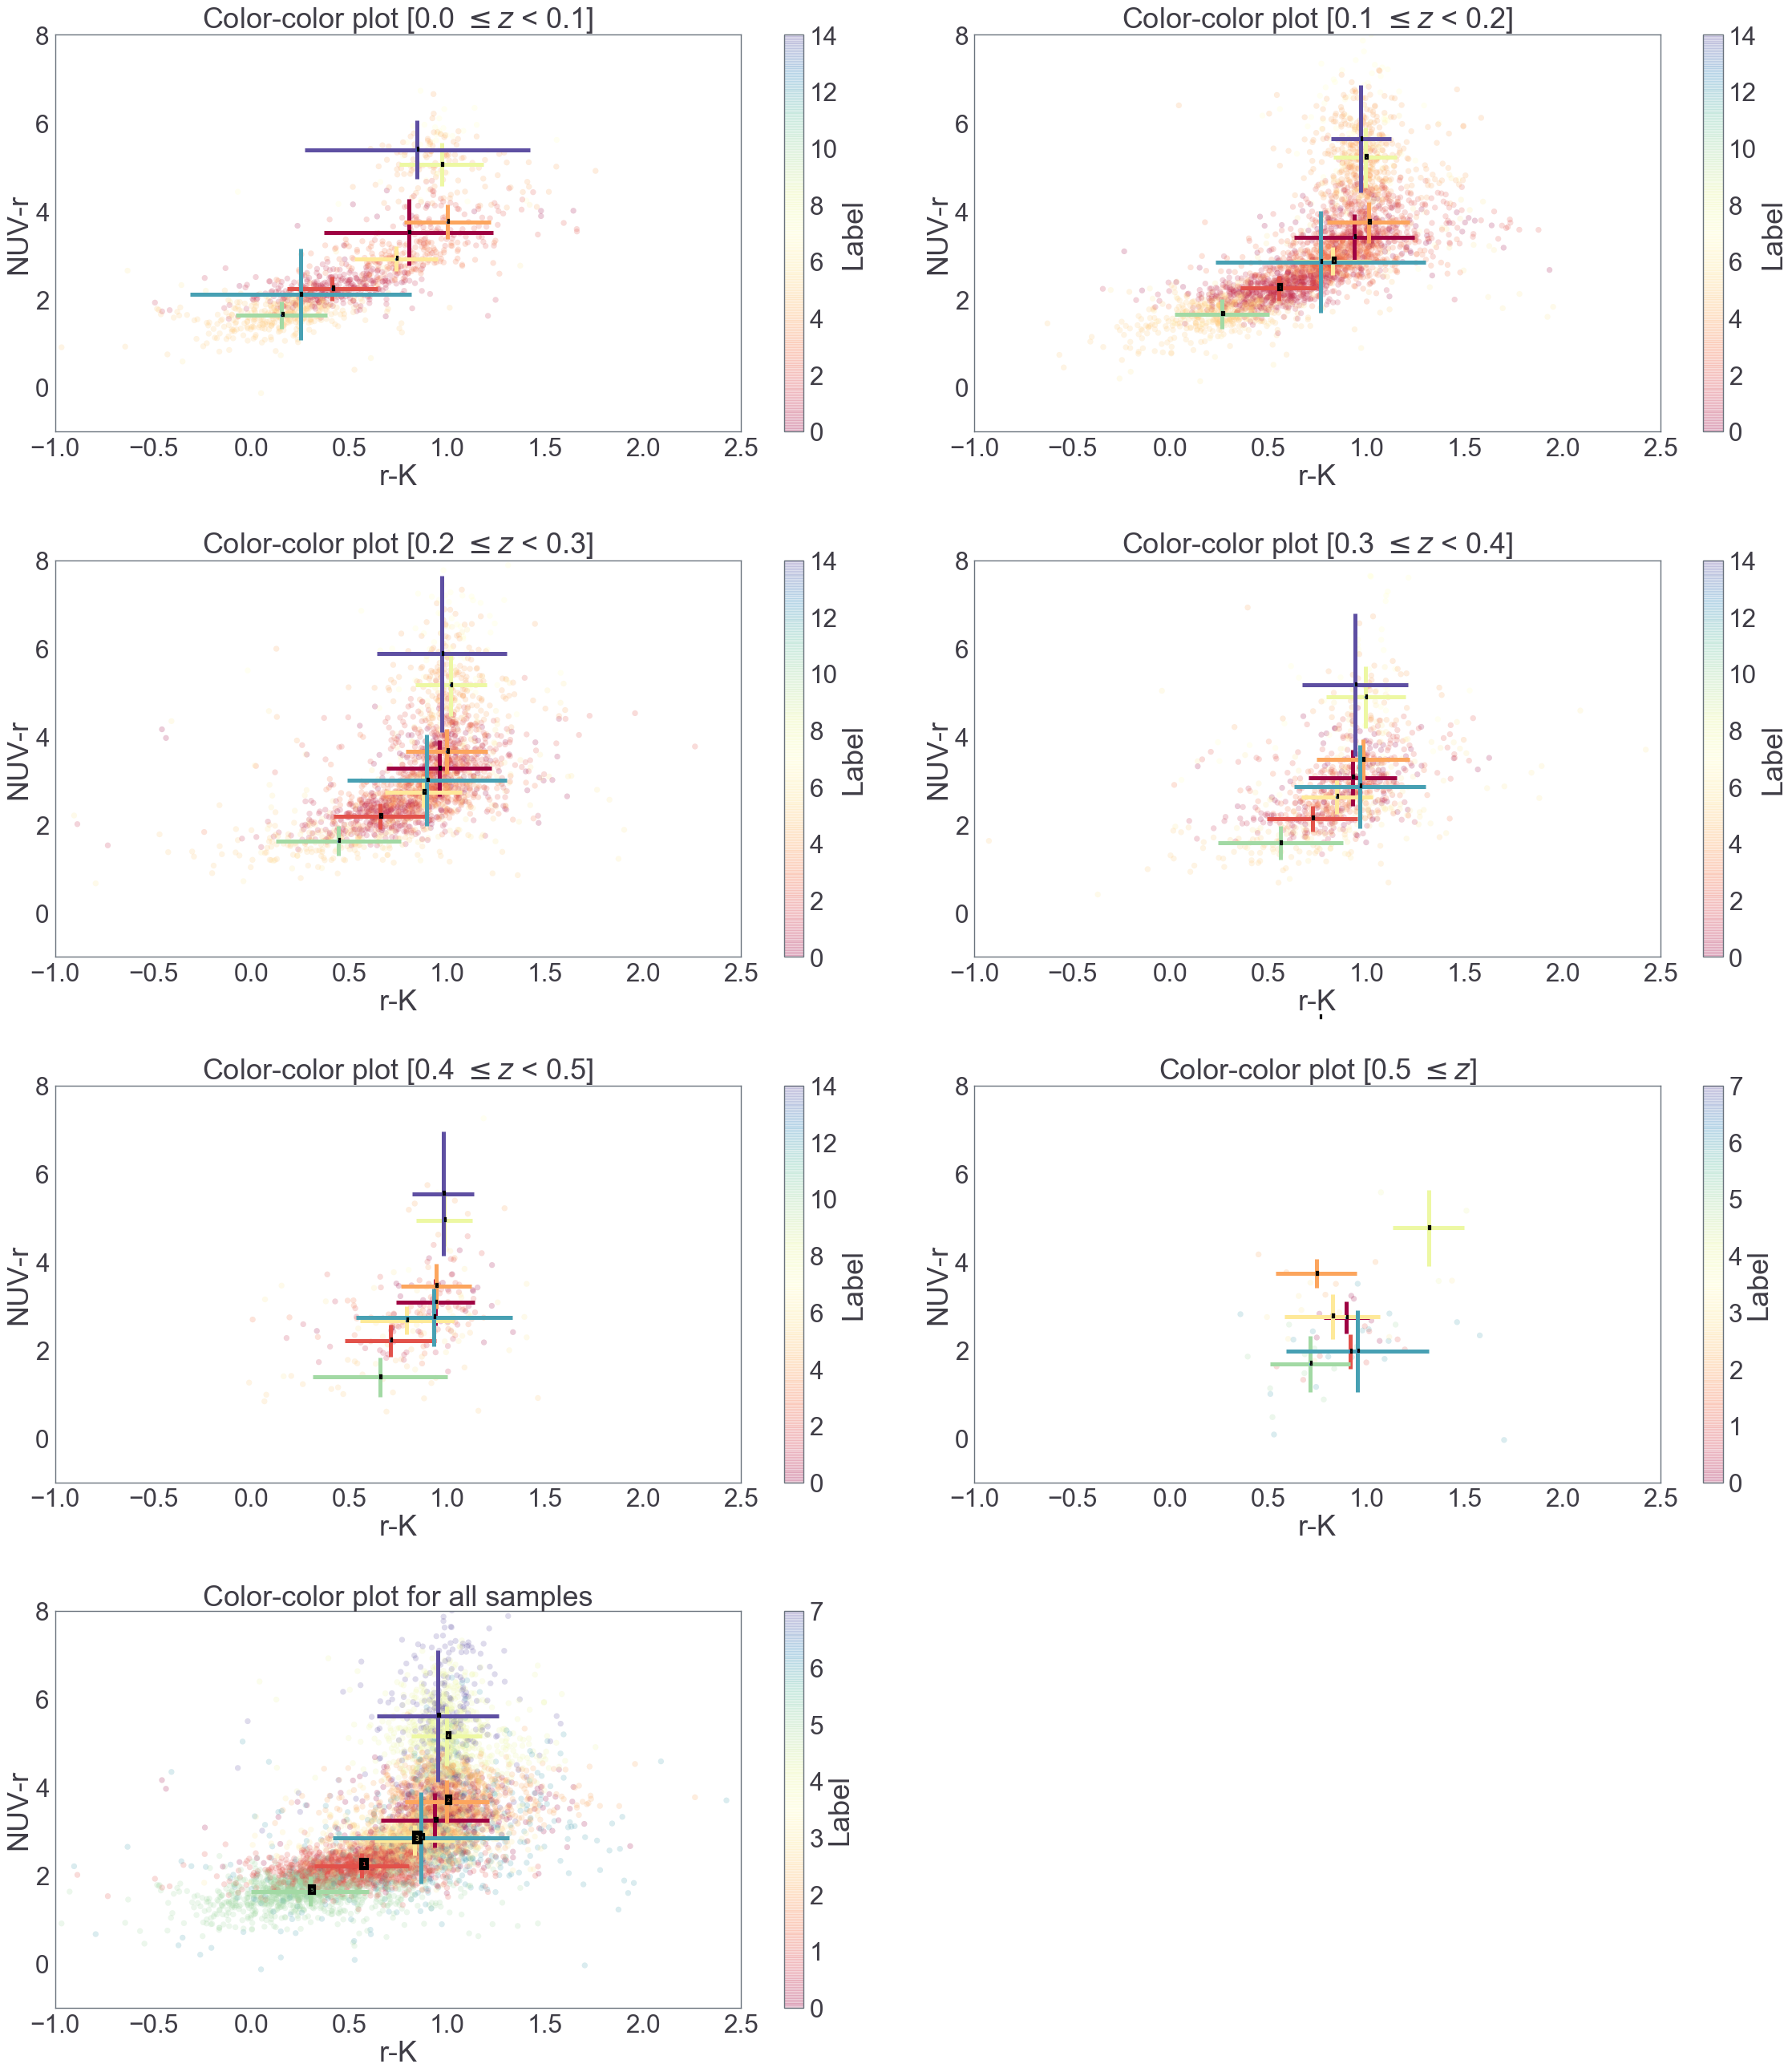

In [15]:
#  Color-color plot with colorbars based on redshift
plt.figure(figsize=(32, 36))
for i in tnrange(6):
    if i <= 4:
        plt.subplot(421 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i) & (DATA_GAMA_FLUX['Z_TONRY'] < (0.1 * i) + 0.1)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=14)
        plt.xlabel('r-K')
        plt.xlim([-1, 2.5])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$ < %s]'%('{:.1f}'.format((0.1 * i)), '{:.1f}'.format((0.1 * i) + 0.1)))
        for j in range(N_COMP):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
    else:
        plt.subplot(421 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=(N_COMP-1))
        plt.xlabel('r-K')
        plt.xlim([-1, 2.5])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$]'%('{:.1f}'.format(0.1 * i)))
        for j in range(N_COMP):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
plt.subplot(427)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax= (N_COMP-1))
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])
plt.title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
    print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
    if not np.isnan(x_mean):
        plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
plt.tight_layout()

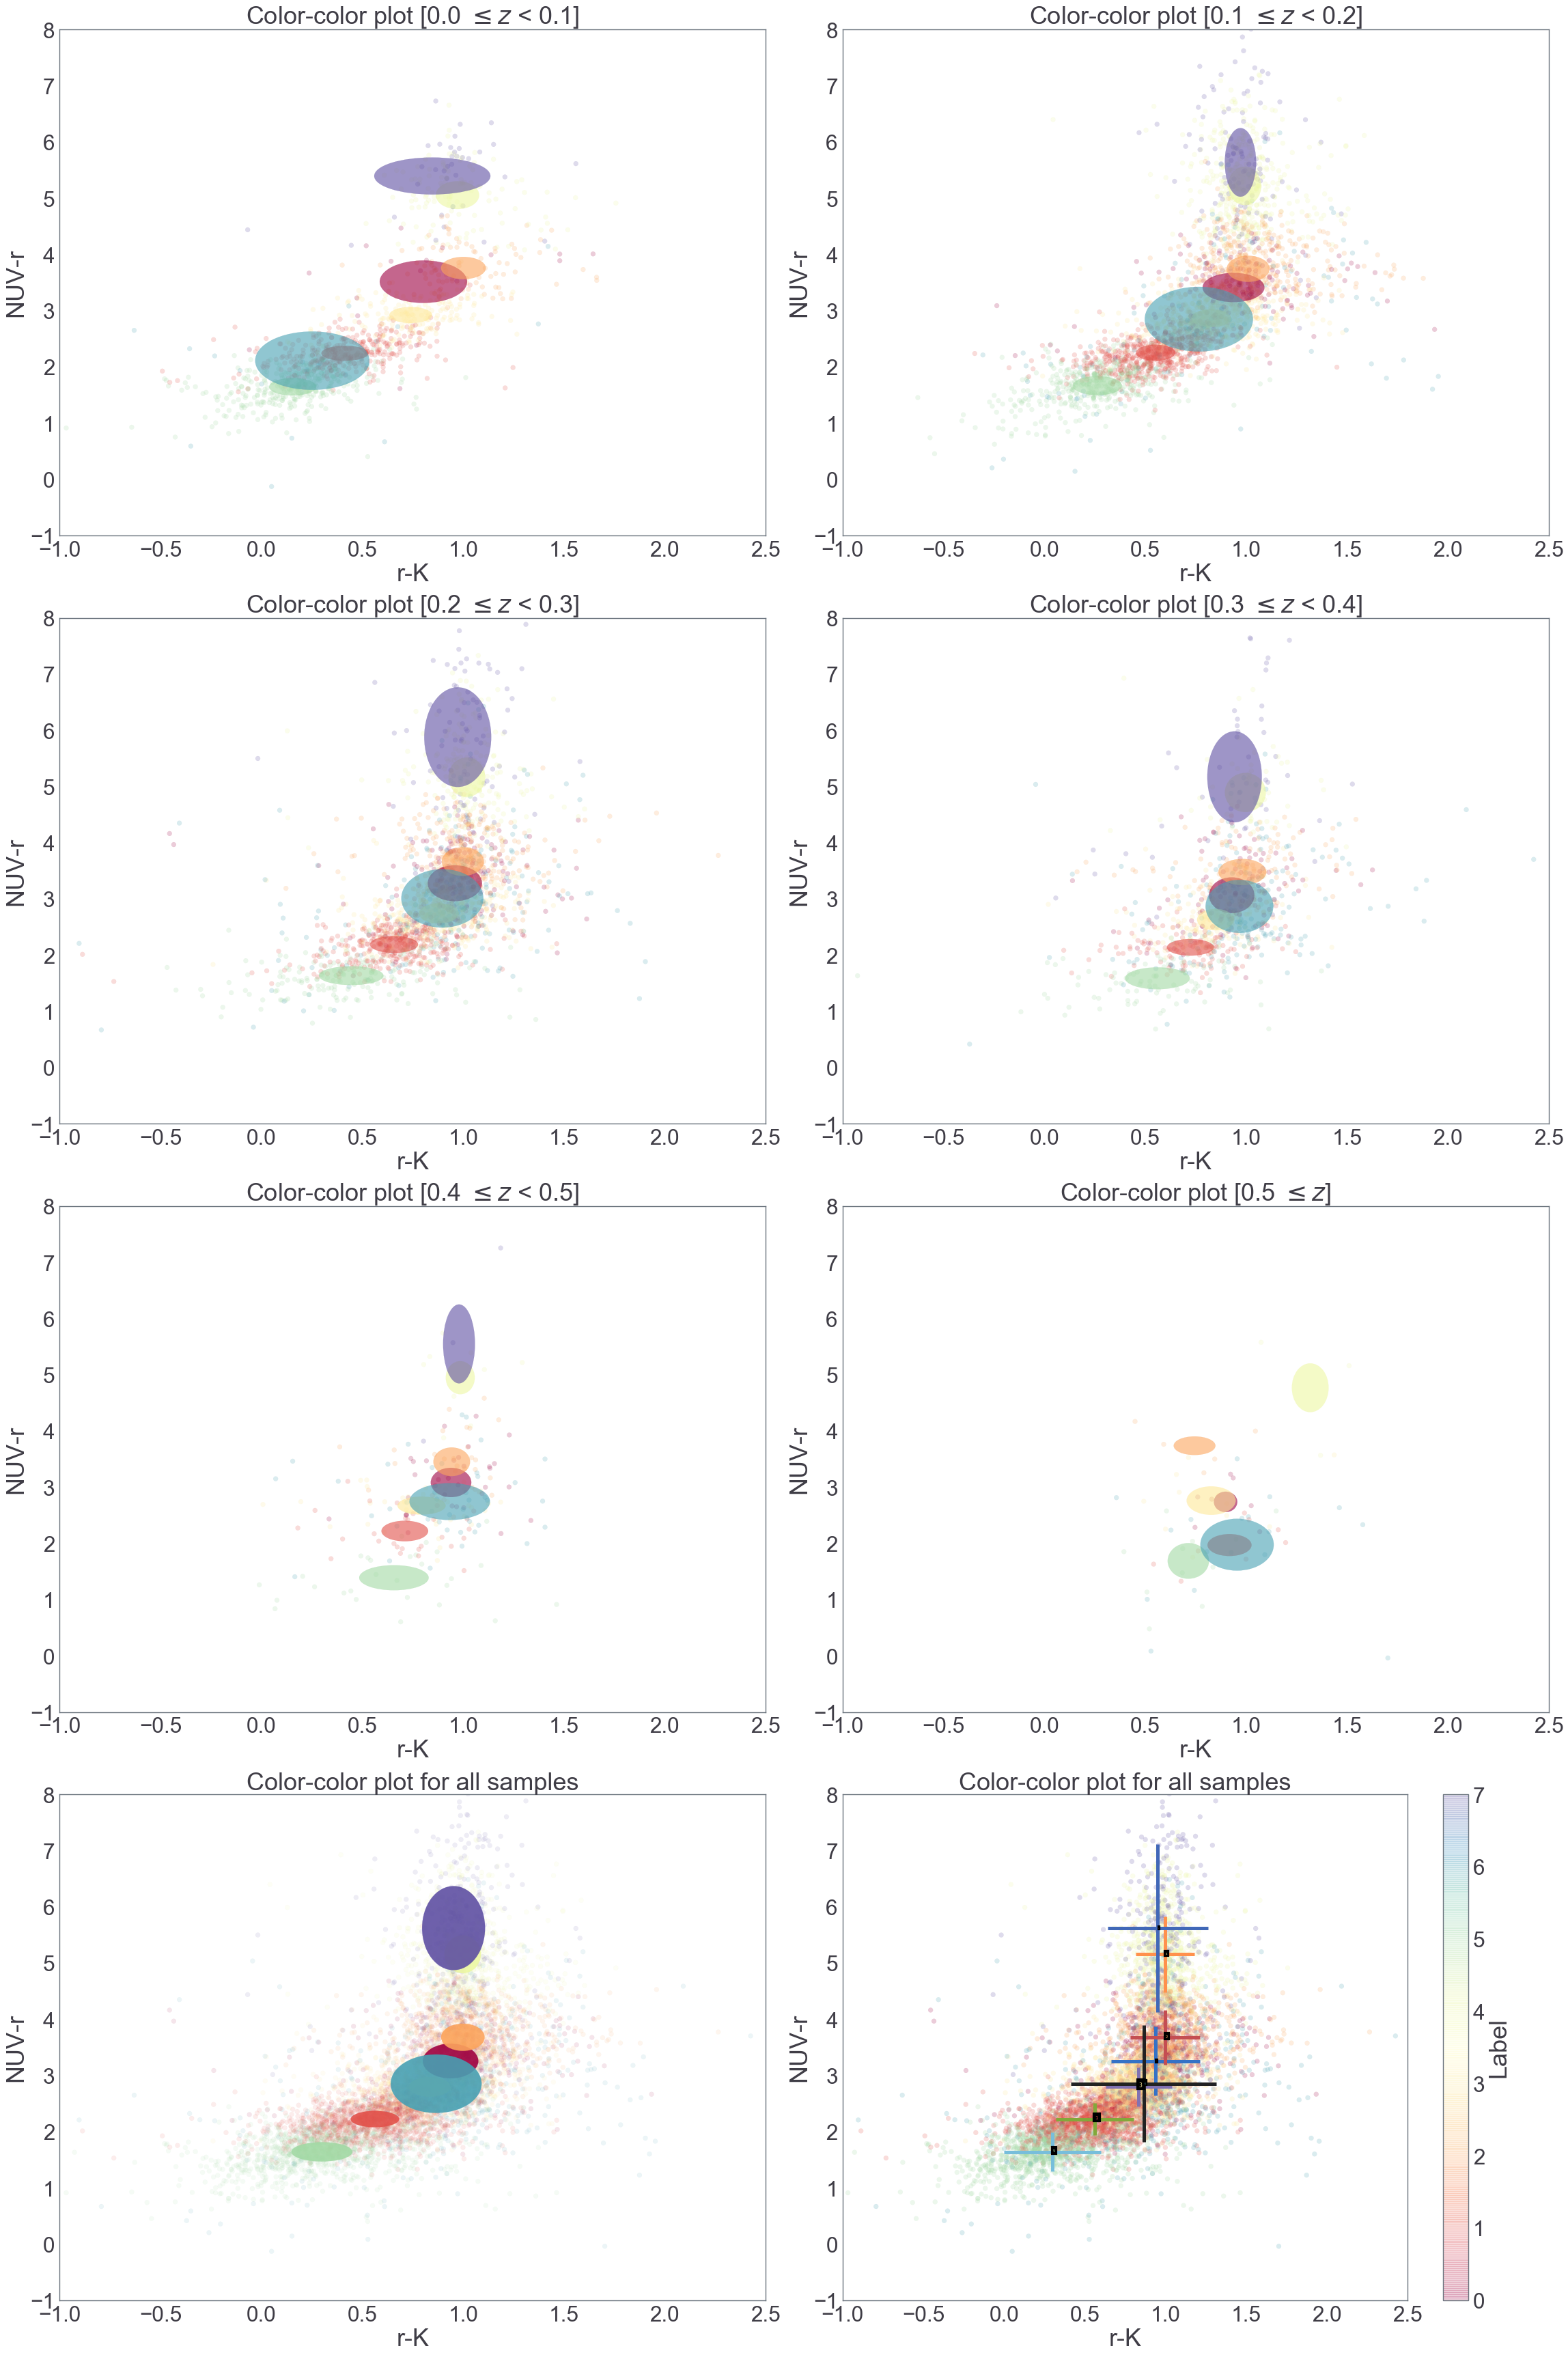

In [16]:
#  Color-color plot with colorbars based on redshift
fig = plt.figure(figsize=(32, 48))
for i in tnrange(6):
    if i <= 4:
        ax = fig.add_subplot(421+i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i) & (DATA_GAMA_FLUX['Z_TONRY'] < (0.1 * i) + 0.1)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        ax.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        ax.set_xlabel('r-K')
        ax.set_xlim([-1, 2.5])
        ax.set_ylabel('NUV-r')
        ax.set_ylim([-1, 8])
        ax.set_title(r'Color-color plot [%s $\leq z$ < %s]'%('{:.1f}'.format((0.1 * i)), '{:.1f}'.format((0.1 * i) + 0.1)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.6, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
                ax.add_patch(e1)
    else:
        ax = fig.add_subplot(421+i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        ax.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        ax.set_xlabel('r-K')
        ax.set_xlim([-1, 2.5])
        ax.set_ylabel('NUV-r')
        ax.set_ylim([-1, 8])
        ax.set_title(r'Color-color plot [%s $\leq z$]'%('{:.1f}'.format(0.1 * i)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.6, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
                ax.add_patch(e1)

ax = fig.add_subplot(427)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.9, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
        ax.add_patch(e1)
        
plt.subplot(428)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=N_COMP-1)
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])
plt.title('Color-color plot for all samples')
for j in range(15):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
    #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
    if not np.isnan(x_mean):
        plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5)
plt.tight_layout()